In [18]:
import numpy as np
from torchvision.models.segmentation import fcn_resnet50
import torch
import torch.nn as nn
from unet import UNet
from Fpn import FPN
from histology_dataset import histologyDataset
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split
from torch import optim
from tqdm import tqdm
import matplotlib.pyplot as plt

In [19]:
dataset = histologyDataset("./histology_dataset/test/images/", "./histology_dataset/test/GT/")
len(dataset)

18991

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = fcn_resnet50(pretrained=False, progress=False, num_classes=21)
model.to(device=device)
# model.load_state_dict(torch.load("./checkpoints/best_model_87.6735532283783.pth", map_location=device))
model.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

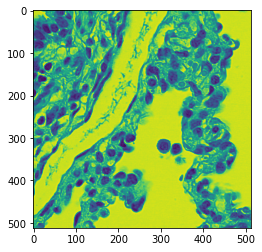

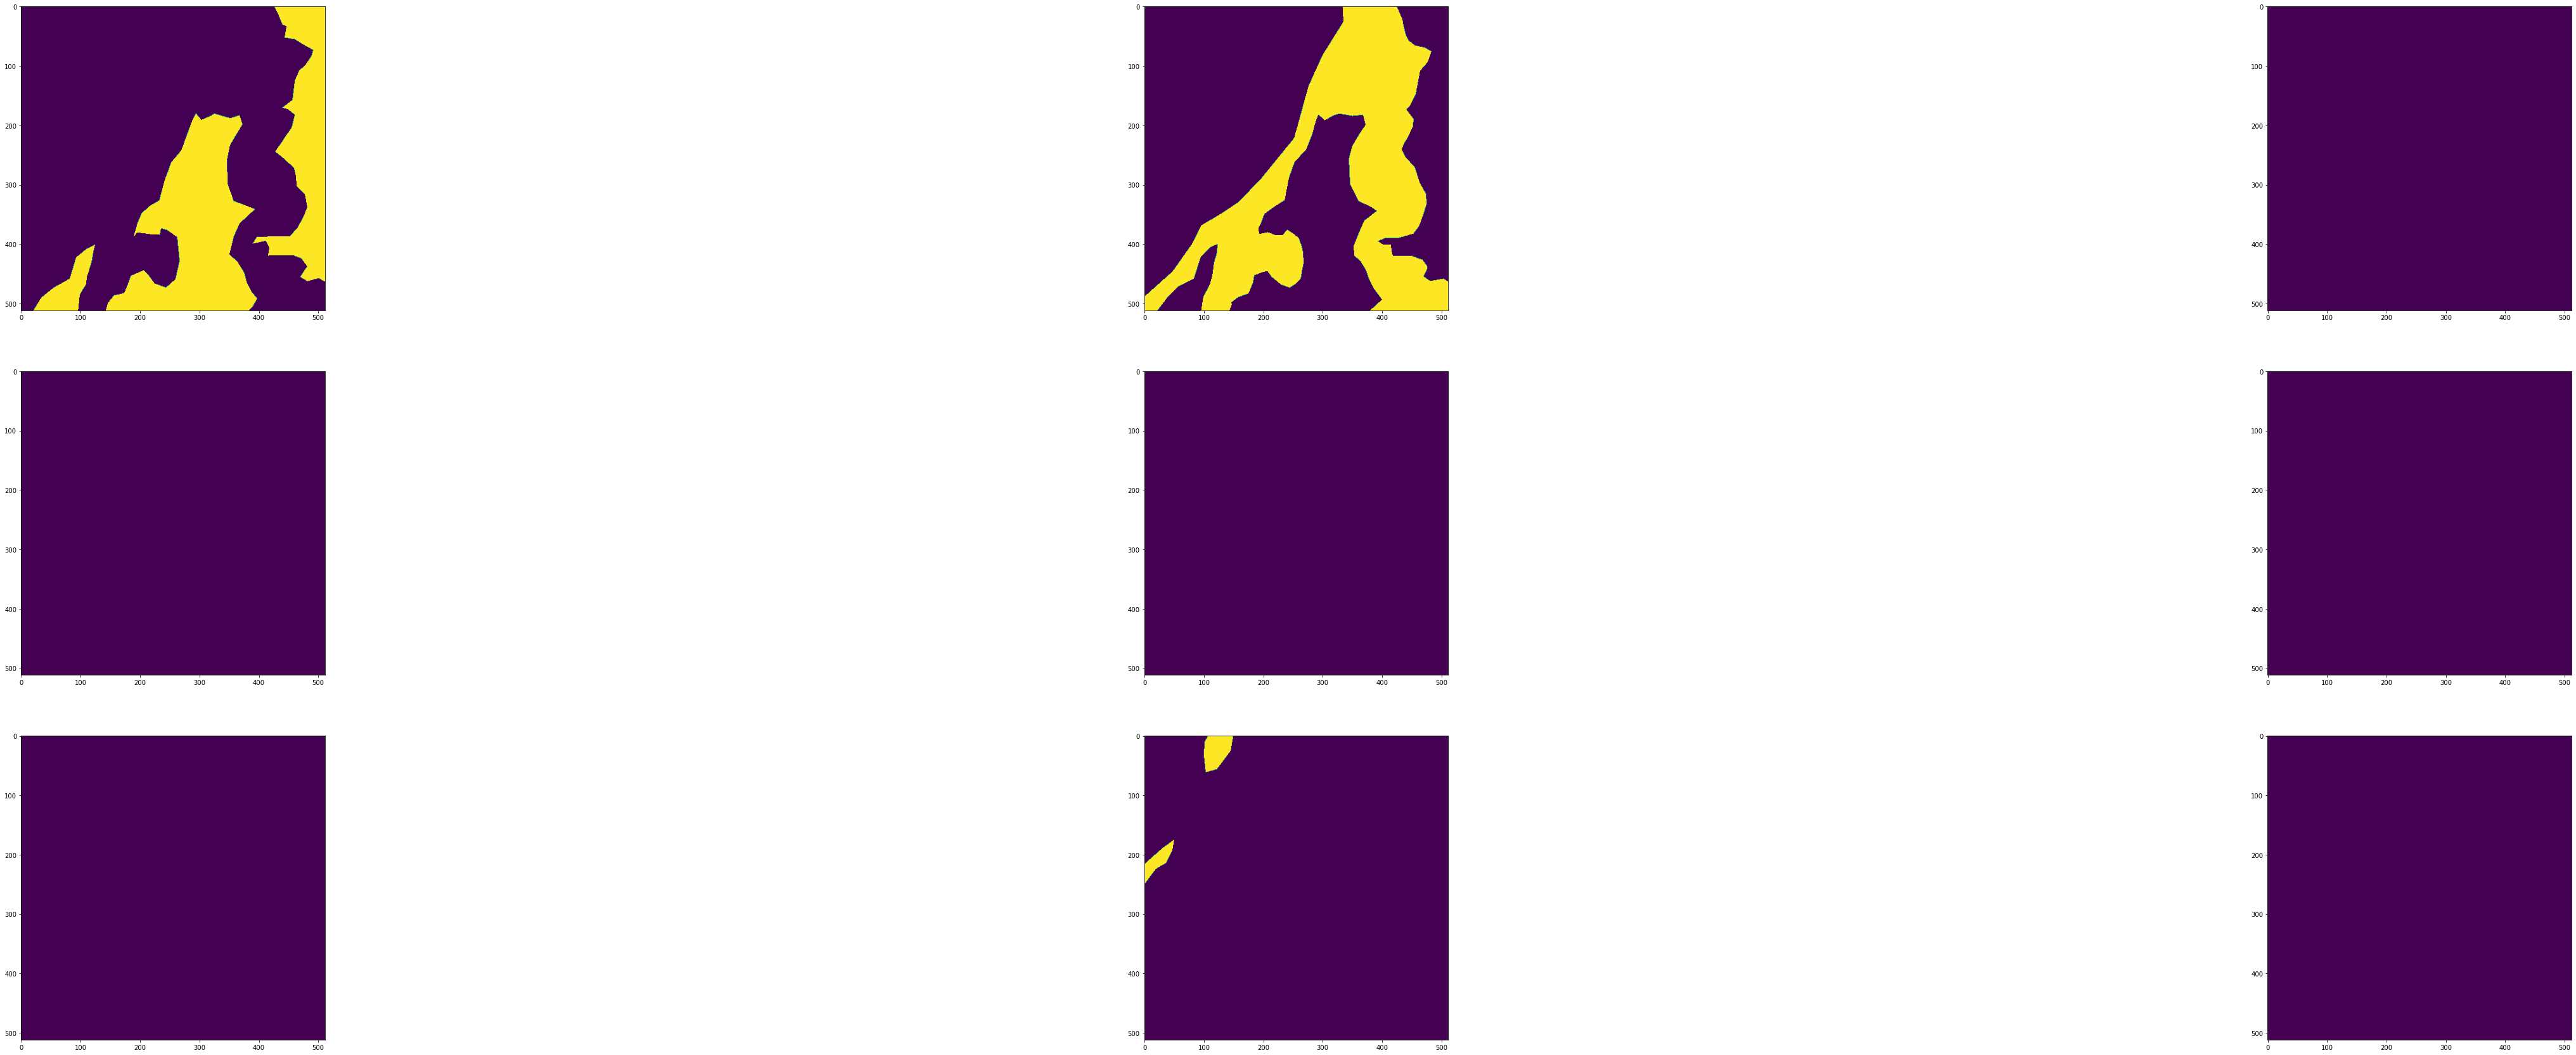

In [21]:
n = 200
im1 = dataset[n]['image']
masks = dataset[n]['mask']
plt.imshow(im1[0])
fig, axs = plt.subplots(3, 3, figsize=(90,30))
for i in range(masks.shape[0]):
    axs[int(i/3), int(i%3)].imshow(masks[i])

In [22]:
im1 = torch.unsqueeze(im1, 0).to(device=device)
outs = torch.squeeze(model(im1).cpu().detach()).numpy()
fig1, axs1 = plt.subplots(3, 3, figsize=(90,30))
for i in range(outs.shape[0]):
    axs1[int(i/3), int(i%3)].imshow(outs[i]*255)

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 1, 512, 512] to have 3 channels, but got 1 channels instead

In [17]:
model(im1)[0]['masks'].shape

torch.Size([100, 1, 512, 512])

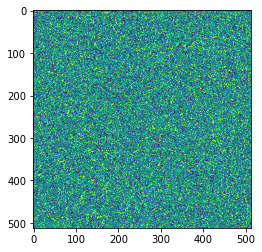

In [86]:
plt.imshow(np.random.randint(2, size=(512, 512))*255)